# Lecture 8: RK2 in multiple dimentions
This week we're doing the same thing as last week but now with more dimentions. 

1. Lists
1. rk2.py
2. Examples

In [8]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 5'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 5
 baseball.py
 efld.py
 long_ball.py
'Lorenz Solutions.png'
'Meth of Computational Physics - 10172018 - 1121 AM.zip'
 pendulum.py
 __pycache__/
 rk2.py
'Table of Contents.html'
 tan_vec.py


In [9]:
%run rk2.py
import numpy as np
import matplotlib.pyplot as plt

# Lists
A list is just a container of things. Most of the time we've been dealing with lists of numbers

In [10]:
foo = [3, 7, 9, 19, 198, 1]

Then we can call elements of the list

In [11]:
print(foo[0], foo[4], foo[0:4:2])

3 198 [3, 9]


Notice that when we do 
    
    foo[0:3] 

it only prints the values for
    
    foo[0], foo[1], foo[2].
    
it doesn't print out the last value.

Lists don't need to just be lists of numbers it can be lists of any python variable

In [12]:
bar = ['Hello', 42, 'World', 6,True, rk2, 3, 'More words', np.pi == np.exp(1) ]

In [13]:
print(bar)

['Hello', 42, 'World', 6, True, <function rk2 at 0x7fc64d5b1510>, 3, 'More words', False]


In [14]:
print(bar[0], bar[4], bar[0:3])

Hello True ['Hello', 42, 'World']


For our multiple dimention problem it will be really usefull to have lists of lists

In [15]:
bob = [ [1,2,3,4], [2,3,4,5], 3, [4,1,9], [6] ]

In [16]:
print(bob)

[[1, 2, 3, 4], [2, 3, 4, 5], 3, [4, 1, 9], [6]]


In [17]:
print(bob[0], bob[4], bob[0:3])

[1, 2, 3, 4] [6] [[1, 2, 3, 4], [2, 3, 4, 5], 3]


# RK2

In [31]:
# %load rk2.py
import numpy as np
def rk2(y0, t0, tf, dt, deriv_func):
    """
    General RK2 solver

    Inputs
    ----------
    y0:         Starting 'y' values. y0 Can be an array/list of any number of dimentions
    t0, tf:     Initial and Final independent variables
    dt:         Step size for the independent variable
    deriv_func: Derivative function that I want to solve for

    Output
    ----------
    t:  Array of independent variables
    y:  Array of dependent variables values. The first intex corresponds to the time step and the second corresponds to
        the dependent variable number
    """

    t = np.arange(t0, tf+dt, dt)
    n_steps = len(t)    # Number of steps to take

    y = np.zeros((n_steps, len(y0))) #Makes an array of zeros

    y[0,:] = y0 #Sets the first row in y to be the initial values.

    for n in range(n_steps-1):
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f
        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = (y[n,:] + dt*f_star)
    return t, y


Lets look at an array of arrays to better understand what's happening with the line

    y = np.zeros((n_steps, len(y0))) #Makes an array of zeros
    
   

In [32]:
x = np.random.randint(0,10,(10,3)) # Make an array of random numbers from 0-9 with size 10 x 3
x

array([[0, 1, 6],
       [7, 1, 5],
       [4, 1, 9],
       [5, 9, 9],
       [4, 9, 4],
       [7, 8, 0],
       [0, 9, 6],
       [2, 9, 5],
       [2, 5, 7],
       [6, 1, 9]])

In [33]:
# If I want one element of 'y'
print(x[2])
# OR
print(x[2, :])
# If I want one element of one element of y
print(x[2, 1])
# OR
print(x[2][1])
# If I want the first element of all of the elements of 'x'
print(x[:, 1])
print(x[4,1])

[4 1 9]
[4 1 9]
1
1
[1 1 1 9 9 8 9 9 5 1]
9


#### Important Note
the the syntax x[n, m] only works for numpy arrays. The standard python list doesn't understand something with multiple dimentions. 

# Examples!

In [34]:
import numpy as np
def b_wire2(x, w, I):
    """
    Finds the magnetic field at point 'x' from a wire of current 'I' located at point w 
    """ 
    
    mu = 4*np.pi*10**-7
    dx = x[0] - w[0]
    dy = x[1] - w[1]
    s = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx) #Remember arctan2 has inputs (y,x) f
    b_field = mu*I / (2*np.pi * s) * np.array([-np.sin(theta), np.cos(theta)])
    return b_field

In [35]:
def multi_wire_ideal(x):
    """
    Takes a list of possitions and a list of currents and finds the total magnetic field from all of them
    
    Inputs
    ----------
    x:  Place where I want to know the magnetic field. 
        
    Output
    ----------
    b_field: Total magnetic field from all the wires.
    """
    b1 = b_wire2(x, [0,0], -10)
    b2 = b_wire2(x, [0,0.005], 10)
    b3 = b_wire2(x, [0.005, 0], 10)
    b4 = b_wire2(x, [0.005,0.005], -10)
    b_field = b1 + b2 + b3 + b4
    return b_field

def multi_wire_mag_ideal(x):
    B = multi_wire_ideal(x)
    mag = B[0]**2 + B[1]**2
    return mag

Finding field lines for any vector field is solving the differential equation

\begin{equation}
\frac{d\vec{r}}{dt} = \frac{\vec{r}}{|\vec{r}|}
\end{equation}

This gives a set of 3 coupled first order ODE's

\begin{align}
\frac{dr_x}{dt} &= \frac{r_x}{\sqrt{r_x^2 + r_y^2 + r_z^2}} \\
\frac{dr_y}{dt} &= \frac{r_y}{\sqrt{r_x^2 + r_y^2 + r_z^2}} \\
\frac{dr_z}{dt} &= \frac{r_z}{\sqrt{r_x^2 + r_y^2 + r_z^2}}
\end{align}



In [36]:
def tan_mag(r,s):
    b = multi_wire_ideal(r)
    #Output of multi_wire_ideal is B = [B_x, B_y, B_z]
    b_mag = multi_wire_mag_ideal(r)
    return b / b_mag

/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


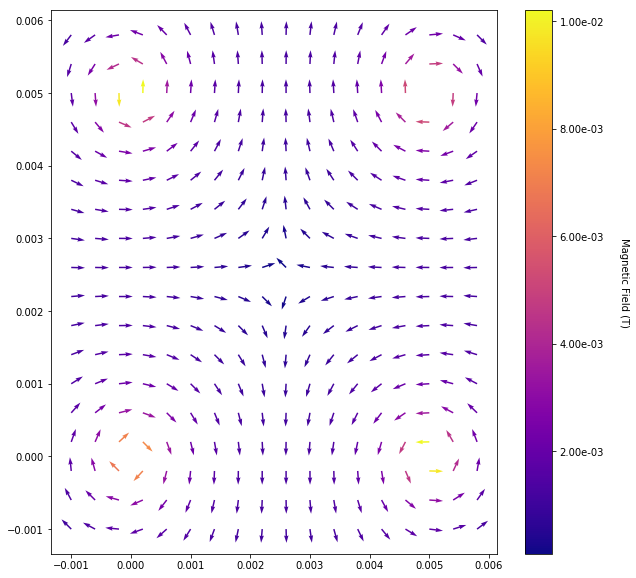

In [37]:
X, Y = np.mgrid[-0.001:0.006:4e-4, -0.001:0.006:4e-4]
U = multi_wire_ideal([X,Y])
M = np.sqrt(U[0]**2+U[1]**2) # magnitude
plt.figure(figsize = (10,10))
plt.quiver(X, Y, U[0]/M, U[1]/M, M ,cmap=plt.cm.plasma)
cbar = plt.colorbar(format='%.2e')
cbar.set_label('Magnetic Field (T)', rotation = 270, labelpad=25)
plt.show()

/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/home/cody/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in multiply
  if sys.path[0] == '':


Text(0,0.5,'y (m)')

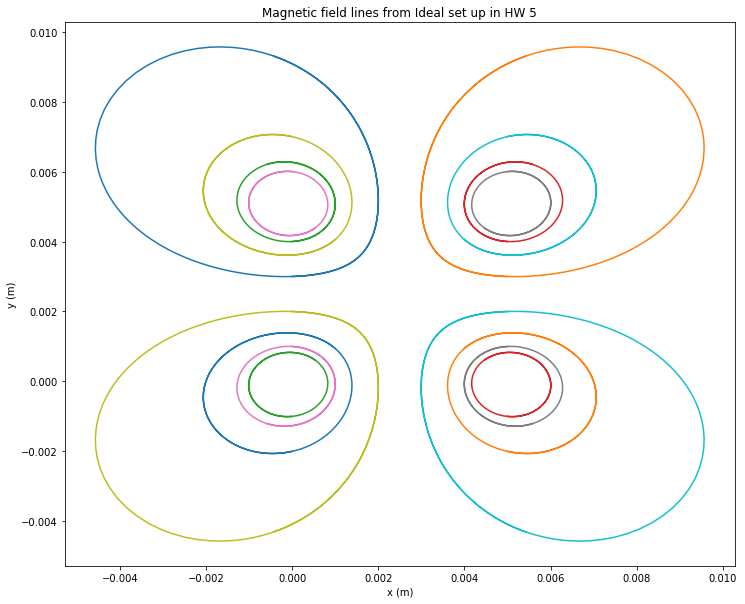

In [55]:
plt.figure(figsize = (12, 10))

#I want to go through a range of different initial conditions.
for y in np.arange(-0.002,0.008, 0.001):
    for x in [0, 0.005]:
        
        s, r = rk2([x,y], 0, 2e-5, 5e-8, tan_mag) # End value of 2e-5 was chosen just from guess and check. 
        
        plt.plot(r[:, 0], r[:, 1],)
        
plt.title('Magnetic field lines from Ideal set up in HW 5')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

In [39]:
r

array([[0.005     , 0.007     ],
       [0.00506165, 0.00701569],
       [0.00512505, 0.00702935],
       [0.00519015, 0.00704079],
       [0.00525689, 0.00704984],
       [0.00532518, 0.00705633],
       [0.00539492, 0.00706008],
       [0.005466  , 0.00706091],
       [0.00553826, 0.00705865],
       [0.00561154, 0.00705312],
       [0.00568564, 0.00704417],
       [0.00576037, 0.00703165],
       [0.00583548, 0.00701543],
       [0.00591073, 0.00699539],
       [0.00598582, 0.00697144],
       [0.00606048, 0.00694352],
       [0.0061344 , 0.0069116 ],
       [0.00620727, 0.00687567],
       [0.00627876, 0.00683576],
       [0.00634854, 0.00679193],
       [0.00641631, 0.0067443 ],
       [0.00648175, 0.006693  ],
       [0.00654457, 0.0066382 ],
       [0.00660448, 0.00658011],
       [0.00666124, 0.00651897],
       [0.00671462, 0.00645504],
       [0.00676443, 0.0063886 ],
       [0.00681051, 0.00631996],
       [0.00685273, 0.00624944],
       [0.00689101, 0.00617734],
       [0.

In [42]:
def Lorenz(w, t):
    """
    The Lorenz equations are chaotic first order set of ODE's
    Inputs
    
    w = [x, y, z]
    
    """
    sigma = 10
    r = 28
    b = 8/3
    
    dx = sigma * (w[1] - w[0])
    
    dy = r*w[0] - w[1] -w[0]*w[2]
    
    dz = w[0]*w[1] - b*w[2]
    
    dw = np.array([dx, dy, dz])
    return dw

In [48]:
t, w = rk2([10,4,19], 0, 20, 0.001, Lorenz)
t2, w2 = rk2([11,4,19], 0, 20, 0.001, Lorenz) # Small change in initial conditions give really different results

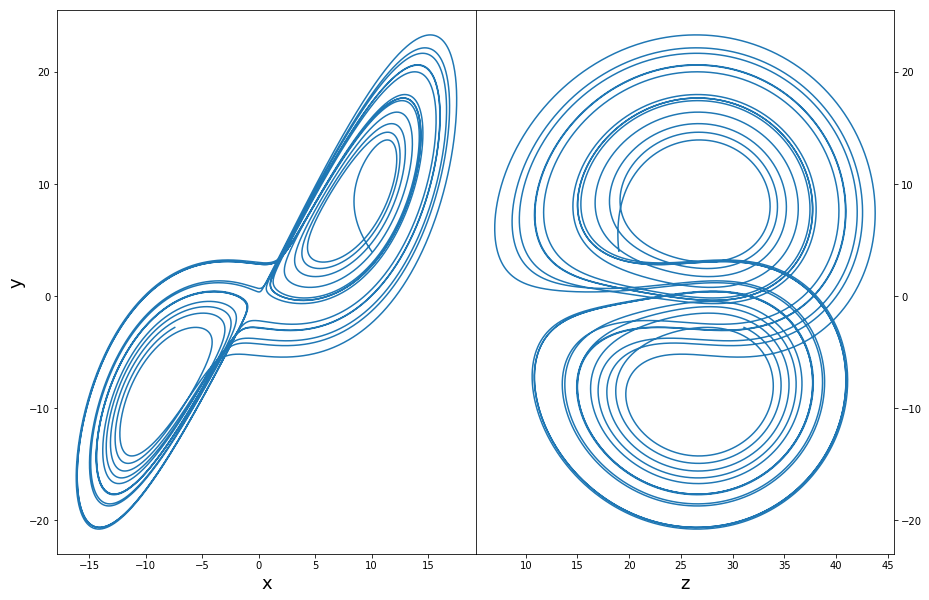

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,10))
fig.subplots_adjust(wspace=0)

ax1.plot(w[:, 0], w[:, 1])
ax1.set_ylabel('y', size = 18)
ax1.set_xlabel('x', size = 18)

ax2.plot(w[:, 2], w[:, 1])
ax2.yaxis.tick_right()
ax2.set_xlabel('z', size = 18)
plt.show()

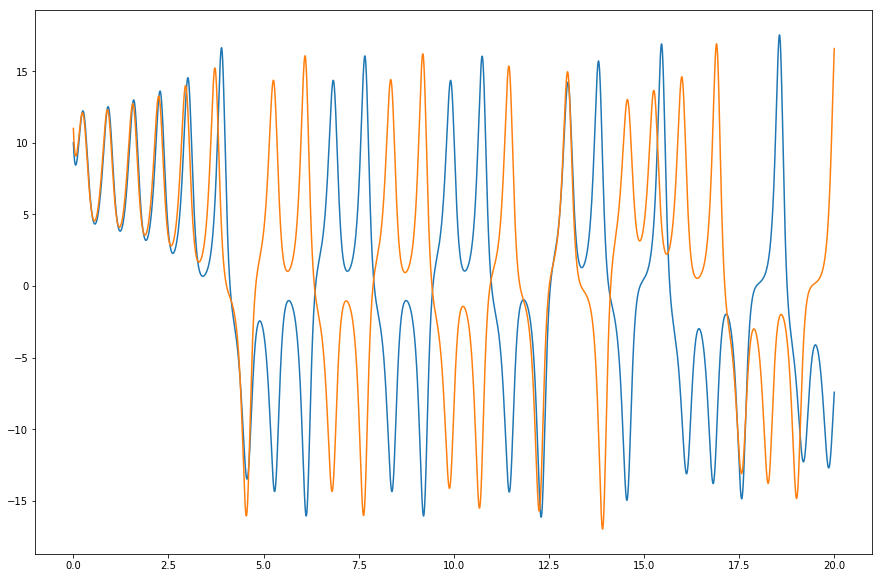

In [58]:
# Make a plot of just the 'x' vlaues
plt.figure(figsize = (15,10))
plt.plot(t, w[:, 0])
plt.plot(t2, w2[:,0])